<Axes: xlabel='time'>

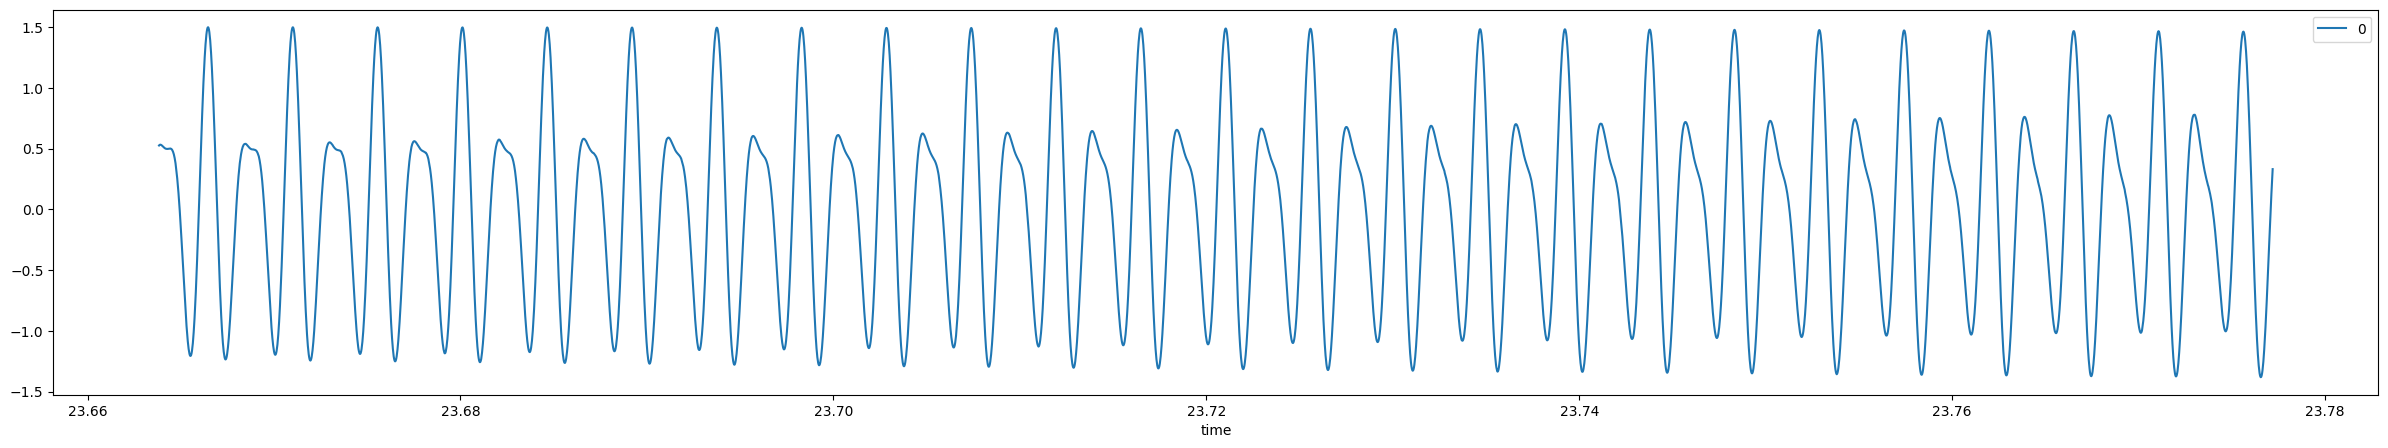

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

values = pd.read_csv('output.csv')

values['time'] = values.index * (1/44100)



values[-5000:].plot(x='time', figsize=(30, 5))


<Axes: xlabel='freq'>

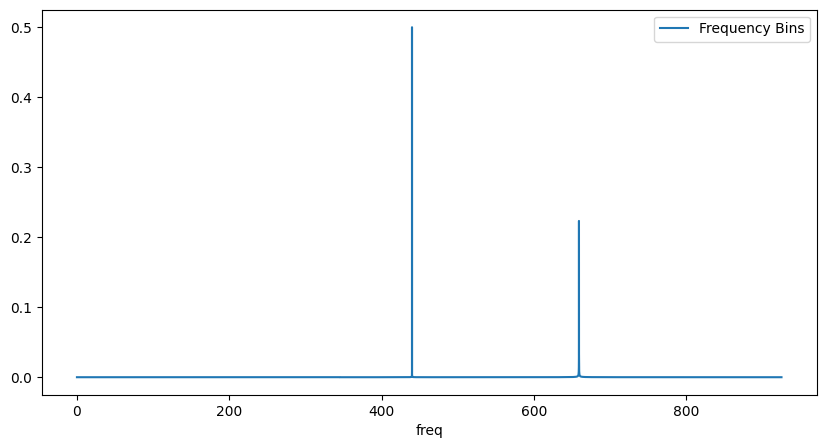

In [34]:
fft = pd.read_csv('mags.csv', names=['Frequency Bins'])
fft['freq'] = fft.index * (44100)/(1024 * 1024)
fft[:22000].plot(x='freq', y='Frequency Bins', figsize=(10,5))